# BOSTON:

In [192]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap
from bnn import BNN

import pickle

from coinem.uci import Boston

import matplotlib.pyplot as plt

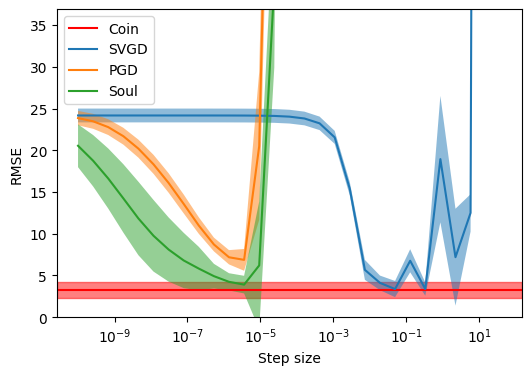

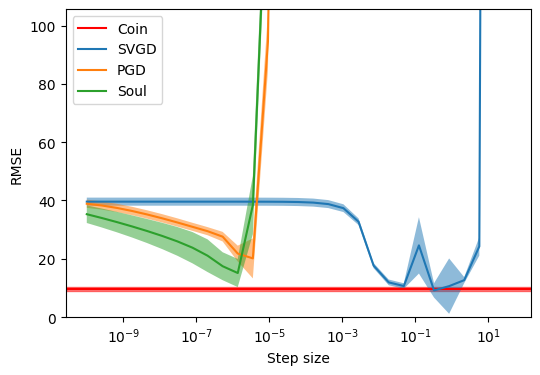

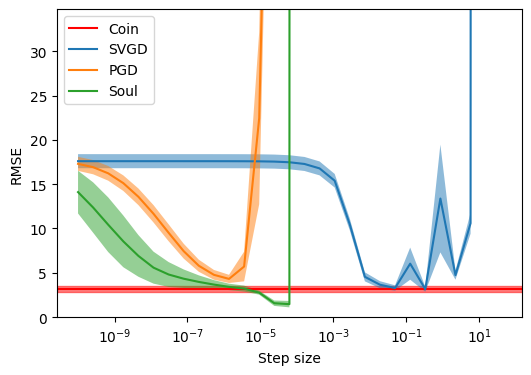

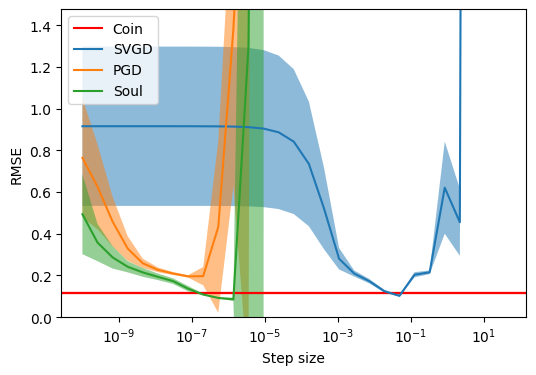

In [194]:

for name in ["Boston", "Concrete", "Energy", "Kin8nm"]: #, "Naval", "Power", "Protein", "Wine", "Yacht"]

    with open(f"results/{name}.pkl","rb") as f:
        data = pickle.load(f)


    adam = jnp.array(data["rmse"]["adam"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    ada = jnp.array(data["rmse"]["ada"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    pgd = jnp.array(data["rmse"]["pgd"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    soul = jnp.array(data["rmse"]["soul"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    coin = jnp.array(data["rmse"]["coin"]) # Repetitions, by iterations

    step_sizes = data["step_sizes"]


    # Index of the iteration to plot
    i = -1

    thresh = 10

    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot coin
    ax.axhline(coin[:, i].mean(axis=0), label="Coin", color = "red")
    ax.axhspan(coin[:, i].mean(axis=0) - coin[:, i].std(axis=0), coin[:, i].mean(axis=0) + coin[:, i].std(axis=0), alpha=0.5, color = "red")

    # # Plot adam
    # ax.plot(step_sizes, adam[:,:,i].mean(axis=0), label='Adam SVGD')
    # ax.fill_between(step_sizes, adam[:,:,i].mean(axis=0) - jnp.minimum(adam[:,:,i].std(axis=0), thresh), adam[:,:,i].mean(axis=0) + jnp.minimum(adam[:,:,i].std(axis=0), thresh), alpha=0.5)

    # Plot ada
    ax.plot(step_sizes, ada[:,:,i].mean(axis=0), label='SVGD')
    ax.fill_between(step_sizes, ada[:,:,i].mean(axis=0) - jnp.minimum(ada[:,:,i].std(axis=0), thresh), ada[:,:,i].mean(axis=0) + jnp.minimum(ada[:,:,i].std(axis=0), thresh), alpha=0.5)

    # Plot pgd
    ax.plot(step_sizes, pgd[:,:,i].mean(axis=0), label='PGD')
    ax.fill_between(step_sizes, pgd[:,:,i].mean(axis=0) - jnp.minimum(pgd[:,:,i].std(axis=0), thresh), pgd[:,:,i].mean(axis=0) + jnp.minimum(pgd[:,:,i].std(axis=0), thresh), alpha=0.5)

    # Plot soul
    ax.plot(step_sizes, soul[:,:,i].mean(axis=0), label='Soul')
    ax.fill_between(step_sizes, soul[:,:,i].mean(axis=0) - jnp.minimum(soul[:,:,i].std(axis=0), thresh), soul[:,:,i].mean(axis=0) + jnp.minimum(soul[:,:,i].std(axis=0), thresh), alpha=0.5)


    plt.ylim(0, 10 * coin.mean())
    plt.xscale('log')
    plt.xlabel('Step size')
    plt.ylabel('RMSE')
    plt.legend()

    plt.savefig(f"results/{name}_rmse.pdf", bbox_inches='tight')